<a href="https://colab.research.google.com/github/jeevallucas/Data-Analyst-Apprentice-at-Zenius/blob/main/Assessment_1_Putu_Jeevallucas_Jnanamaitriya_Surya_Gautama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Menetapkan style Seaborn
from matplotlib import style
style.use('seaborn')
%matplotlib inline

# Menentukan URL dataset
url = 'https://raw.githubusercontent.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/master/datasets/number-of-natural-disaster-events.csv'

# Membaca url file CSV ke dalam DataFrame
df = pd.read_csv(url)

df.head()

<ipython-input-1-8ff8997f08c8>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


# Pembahasan *Warning Message* dalam penggunaan `style.use('seaborn')`
Jika menggunakan `style.use('seaborn')`, lalu melakukan *running*, akan muncul *warning message* sebagai berikut:
```
<ipython-input-1-8ff8997f08c8>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')
```
Peringatan ini mengindikasikan bahwa style Seaborn yang digunakan dengan style.use('seaborn') sudah tidak digunakan lagi dalam versi Matplotlib 3.6. Untuk menghindari peringatan ini dan menggunakan style Seaborn terbaru, kita dapat menggunakan fungsi pengaturan style Seaborn daripada style yang sudah kedaluwarsa dalam Matplotlib.

```
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Atur gaya Seaborn
sns.set_style('whitegrid')
%matplotlib inline

# Tentukan URL dataset
url = 'https://raw.githubusercontent.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/master/datasets/number-of-natural-disaster-events.csv'

# Baca file CSV ke dalam DataFrame
df = pd.read_csv(url)

df.head()

```
Dengan menggunakan sns.set_style('seaborn'), kita dapat mengatur gaya Seaborn secara langsung tanpa memicu MatplotlibDeprecationWarning. Ini seharusnya berfungsi tanpa masalah dan menerapkan gaya Seaborn pada plot dan visualisasi.

## **Kesimpulan**
Saya tetap menggunakan `style.use('seaborn')`.

Kita dapat tetap menggunakan `style.use('seaborn')` jika itu berfungsi tanpa masalah dalam kode kita. Ini adalah cara untuk mengatur style secara global untuk seluruh gambar Matplotlib di sesi kita. Beberapa alasan mengapa saya tetap lebih memilih `style.use` daripada `sns.set_style` adalah:

1. **Pilihan yang Valid**: Saat ini, menggunakan `style.use('seaborn')` pada umumnya masih berfungsi tanpa masalah, bahkan jika pesan peringatan MatplotlibDeprecationWarning muncul. Ini karena Matplotlib tetap mempertahankan dukungan untuk style 'seaborn' yang lebih lama. Namun, di masa depan, dukungan tersebut mungkin akan dihapus sepenuhnya.

2. **Penggunaan Sebelumnya**: Beberapa kode yang lebih lama atau materi pembelajaran yang lebih lama mungkin mengandalkan `style.use('seaborn')`, dan penggunaan ini mungkin tetap valid untuk kode tersebut.

Kode di bawah digunakan untuk **membagi variabel** dataframe ke dalam dua kategori: `numerical_vars` untuk variabel numerik dan `categorical_vars` untuk variabel kategorikal.

Selanjutnya, kode tersebut mengurutkan dataframe `df` berdasarkan kolom `Year` secara **menurun (descending)** sehingga data akan tersusun dari tahun **terbaru ke tahun terlama**.

In [ ]:
# Mendefinisikan variabel numerik
numerical_vars = [
    'Number of reported natural disasters (reported disasters)'
]

# Mendefinisikan variabel kategorikal
categorical_vars = [
    'Entity',
    'Year'
]

Kode di bawah ini merupakan bagian **pemfilteran data** pada dataframe df untuk membersihkan data yang akan digunakan dalam visualisasi. Tujuan dari **pemfilteran** ini adalah untuk menghilangkan beberapa entitas yang **tidak relevan** dan **redundan** dari dataset.

Langkah ini adalah bagian **penting** dari proses **persiapan data**. **Pemfilteran** dilakukan dengan menghilangkan dua jenis entitas dari dataset:

- '**`All natural disasters`**': Kolom ini dihilangkan karena akan memberikan informasi yang **redundan** dalam visualisasi. Entitas ini mencakup seluruh kategori **bencana alam** yang sudah terdaftar dalam dataset.
- '**`Impact`**': Entitas ini dihilangkan karena muncul hanya satu kali dalam dataset, dan keberadaannya patut dipertanyakan apakah itu benar-benar merupakan **bencana alam** atau **data yang kurang tepat**.

Dengan melakukan **pemfilteran** ini, kita dapat fokus pada data yang benar-benar **relevan** dan menghindari **redundansi** dalam visualisasi.

Selanjutnya, kita akan mengurutkan data berdasarkan kolom '**`Year`**' secara **menurun**, sehingga data akan tersusun dari tahun terbaru ke tahun terlama, mempermudah analisis tren seiring waktu.

In [ ]:
# Memfilter data
filtered_df = df[(df['Entity'] != 'All natural disasters') & (df['Entity'] != 'Impact')]

# Mengurutkan 'Year' secara menurun (descending)
df = filtered_df.sort_values(by='Year', ascending=False)

Kode di bawah **membuat sebuah warna linier** dengan menggunakan `LinearSegmentedColormap` dari modul `mcolors`. Warna ini dibuat berdasarkan rentang nilai tertentu yang telah ditentukan dengan **gradient dari hijau ke kuning dan akhirnya merah**.

Selanjutnya, kode tersebut juga **membuat sebuah pemetaan warna berdasarkan tahun** pada sebuah dataframe `df`. Pemetaan ini akan memberikan warna yang berbeda untuk **setiap tahun dalam dataframe tersebut berdasarkan warna yang telah ditentukan sebelumnya**.

In [ ]:
# Membuat warna linier
cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom', [(0, 'green'), (0.5, 'yellow'), (1, 'red')], N=len(df))

# Membuat pemetaan warna berdasarkan tahun
color_mapping_year = dict(zip(df['Year'], cmap(np.linspace(0, 1, len(df)))))

# **Barplot** (*Horizontal dan Vertical*)

Kode di bawah digunakan untuk membuat barplot.

Pertama, **ukuran gambar** dan **palet warna** diatur, dan sebuah **subplot** dengan dua grafik dibuat untuk menampilkan data dengan lebih efektif.

Kemudian, sebuah **palet warna** dibuat berdasarkan pemetaan warna yang telah dibuat sebelumnya, yang akan digunakan untuk mengisi warna dalam grafik-grafik tersebut.

**Dua grafik batang (barplot)** dibuat, satu **horizontal** dan satu **vertikal**, untuk memvisualisasikan jumlah bencana alam yang dilaporkan berdasarkan entitas dan tahun.

Setiap grafik diberi **label**, **judul**, dan **grid** untuk mempermudah pemahaman, dan **legenda dihapus** karena tidak diperlukan dalam kasus ini.

Selanjutnya, sebuah **peta warna vertikal** ditambahkan untuk menunjukkan hubungan antara warna dan tahun, memberikan konteks visual yang penting.

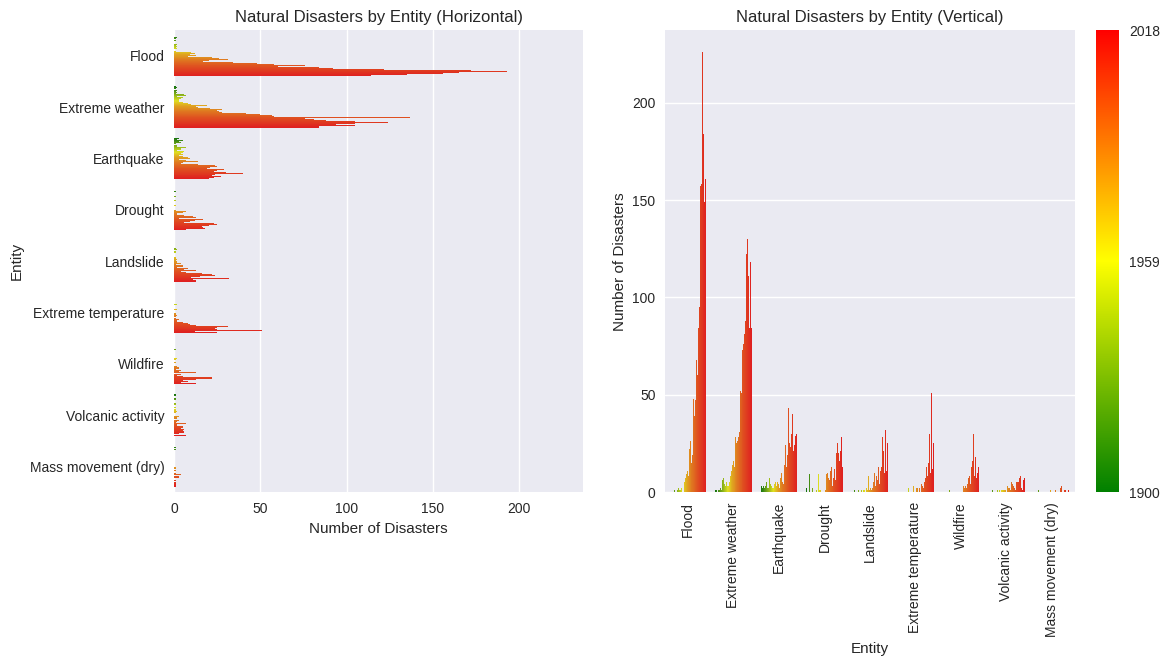

In [ ]:
# Mengatur ukuran gambar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
barplot_palette = sns.color_palette(list((color_mapping_year.values())))

# Menyusun urutan Entity yang sudah diurutkan
entity_order = df.groupby('Entity')['Number of reported natural disasters (reported disasters)'].sum().sort_values(ascending=False).index

# Barplot horizontal
sns.barplot(
    x='Number of reported natural disasters (reported disasters)',
    y='Entity',
    hue='Year',
    data=df,
    orient='h',
    ax=axes[0],
    palette=barplot_palette,
    order=entity_order
)

# Menyesuaikan plot pertama
axes[0].set_title('Natural Disasters by Entity (Horizontal)')
axes[0].set_xlabel('Number of Disasters')
axes[0].set_ylabel('Entity')
axes[0].grid(axis='x', alpha=1)
axes[0].get_legend().remove()

# Barplot vertikal
sns.barplot(
    x='Entity',
    y='Number of reported natural disasters (reported disasters)',
    hue='Year',
    data=df,
    ax=axes[1],
    palette=barplot_palette,
    order=entity_order
)

# Menyesuaikan plot kedua
axes[1].set_title('Natural Disasters by Entity (Vertical)')
axes[1].set_xlabel('Entity')
axes[1].set_ylabel('Number of Disasters')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', alpha=1)
axes[1].get_legend().remove()

# Menambahkan skala warna untuk mencocokkan tahun
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axes, orientation='vertical', pad=0.02)

cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels([df['Year'].min(), (df['Year'].min() + df['Year'].max()) // 2, df['Year'].max()])

plt.show()

## **Insight**
1. Terlihat bahwa **seiring** berjalannya waktu, jumlah bencana alam yang dilaporkan cenderung **meningkat**. Hal ini terlihat dari tingginya barplot pada tahun-tahun terakhir.
2. Ada beberapa entitas yang secara **konsisten** melaporkan jumlah bencana alam yang tinggi, terutama pada tahun-tahun terakhir. Namun, ada kemungkinan bahwa entitas ini melibatkan **populasi** atau **wilayah** yang lebih besar.
3. Beberapa entitas seperti `"Earthquake"` dan `"Extreme weather"` memiliki jumlah bencana yang **tinggi** sepanjang rentang tahun. Terdapat kemungkinan dikarenakan jenis bencana ini lebih **umum**.
4. Beberapa entitas mengalami **fluktuasi** dalam jumlah bencana dari tahun ke tahun. Contohnya, `"Drought"` terlihat fluktuatif pada **beberapa tahun** tertentu.

## **Statistik**/**Fakta dari Data**
Melihat tren **kenaikan** atau **penurunan** jumlah bencana dalam beberapa tahun terakhir dapat memberikan wawasan tentang **perubahan iklim** atau perubahan dalam **pengelolaan bencana** yang selalu berubah seiring berjalannya waktu.

# **Distplot**

Kode di bawah digunakan untuk membuat visualisasi distribusi data jumlah bencana alam yang dilaporkan.

Pertama, kita **mengatur palet warna** dengan menggunakan `sns.color_palette("Set2")` untuk memberikan warna visual yang menarik.

Selanjutnya, kita membuat subplot dengan **grafik distribusi (distribution plot)** menggunakan `sns.distplot`. Plot ini menampilkan distribusi data jumlah bencana alam dengan histogram dan kernel density estimation (KDE).

Plot diberi **label, judul, dan label sumbu** untuk memudahkan interpretasi. Kita juga menambahkan **garis vertikal** yang menunjukkan nilai **mean** dan **median** dari data, serta memberi legenda untuk elemen-elemen ini. Untuk memberikan konteks tambahan, kita menambahkan **plot rug (rugplot)** pada sumbu kedua yang menunjukkan titik data individu pada sumbu utama.

Perlu diperhatikan bahwa dalam pesan peringatan, `distplot` dinyatakan sebagai fungsi yang sudah usang, dan disarankan untuk menggunakan `histplot` di masa mendatang. Ini adalah langkah yang penting untuk memastikan kode tetap kompatibel dengan pembaruan Seaborn.

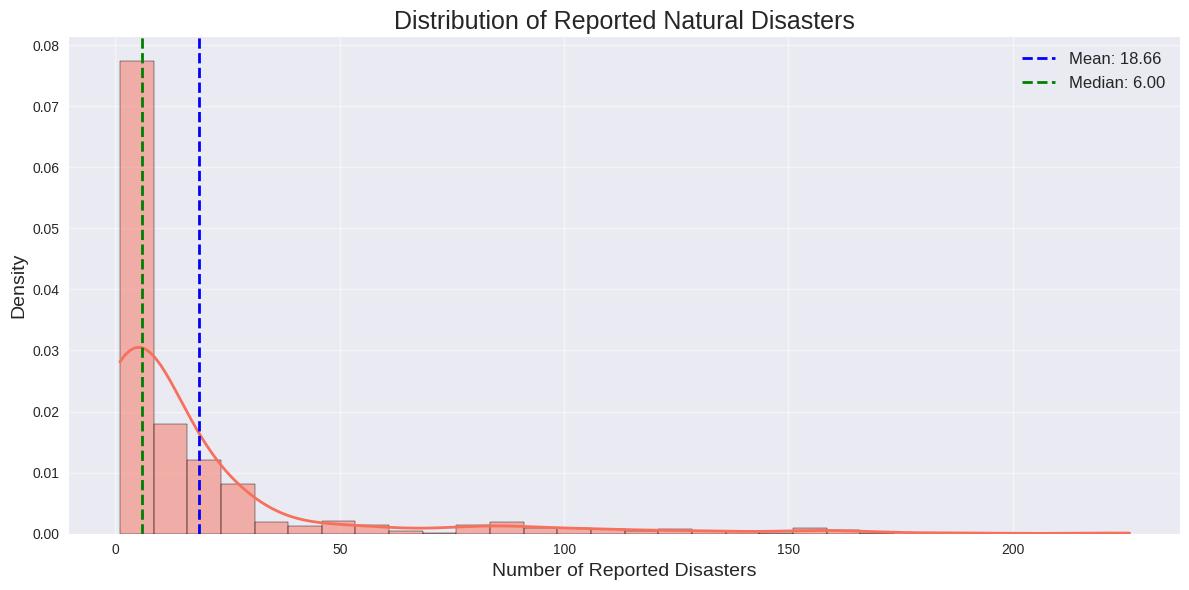

In [ ]:
# Mengatur color palette
colors = sns.color_palette("magma", as_cmap=True)

# Mengatur ukuran
fig, ax = plt.subplots(figsize=(12, 6))

# Membuat distribution plot
sns.histplot(
    df['Number of reported natural disasters (reported disasters)'],
    color=colors(0.7),  # Menyesuaikan intensitas warna
    bins=30,
    kde=True,
    stat="density",
    ax=ax,
    line_kws={'color': 'red', 'lw': 2}  # Mengatur warna dan lebar garis kurva KDE
)

# Mengatur title plot dan label
ax.set_title('Distribution of Reported Natural Disasters', fontsize=18)
ax.set_xlabel('Number of Reported Disasters', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

# Menghitung mean dan median
mean = df['Number of reported natural disasters (reported disasters)'].mean()
median = df['Number of reported natural disasters (reported disasters)'].median()

# Menambahkan garis vertikal untuk mean dan median
ax.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}', linewidth=2)
ax.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}', linewidth=2)

# Menambahkan legend garis vertikal mean dan median
ax.legend(fontsize=12)

# Menyesuaikan tampilan grid
ax.grid(True, axis='both', alpha=0.5)

plt.tight_layout()
plt.show()

## **Insight**
Sebagian besar tahun memiliki jumlah bencana alam di **bawah rata-rata**, tetapi ada beberapa tahun yang **jauh** di atas rata-rata dan median. Ini bisa menjadi fokus untuk **penyelidikan lebih lanjut**.

## **Statistik**/**Fakta dari Data**
Mean (rata-rata) jumlah bencana alam adalah sekitar **18.66**, sedangkan median (nilai tengah) adalah **6.00**. Ini menunjukkan bahwa sebagian besar tahun memiliki jumlah bencana alam yang **relatif rendah**, tetapi ada beberapa dengan jumlah yang **sangat tinggi**.

#**Boxplot**

Kode ini digunakan untuk membuat visualisasi berupa boxplot yang menggambarkan distribusi jumlah bencana alam yang dilaporkan dari berbagai entitas (Entity). Pertama, data jumlah bencana alam yang dilaporkan untuk tiap entitas dihitung, diurutkan berdasarkan total jumlahnya, dan digunakan sebagai urutan entitas dalam plot (`sum_values`).

Kemudian, kita **membuat palet warna** untuk plot dengan menggunakan `sns.color_palette`. Palet warna ini didasarkan pada skala warna dari kuning ke biru-ke-hijau (YlGnBu) dan sesuai dengan jumlah entitas yang ada.

Selanjutnya, kita **membuat boxplot** dan **stripplot** menggunakan `sns.boxplot` dan `sns.stripplot`. Boxplot menampilkan statistik seperti kuartil, median, serta outliers dari data entitas. Stripplot menampilkan titik data individu pada boxplot tersebut.

Grafik ini diberi **judul, label sumbu, dan label sumbu-x** untuk mempermudah interpretasi, serta rotasi label sumbu-x agar lebih mudah dibaca. Pengaturan lain seperti padding pada label dan ukuran font juga disesuaikan untuk penampilan yang lebih baik.

Terakhir, kita menggunakan `plt.tight_layout()` untuk memastikan tampilan visualisasi yang rapi, dan `plt.show()` untuk menampilkan boxplot. Visualisasi ini memungkinkan kita untuk membandingkan distribusi jumlah bencana alam yang dilaporkan oleh berbagai entitas dengan jelas dalam satu gambar.

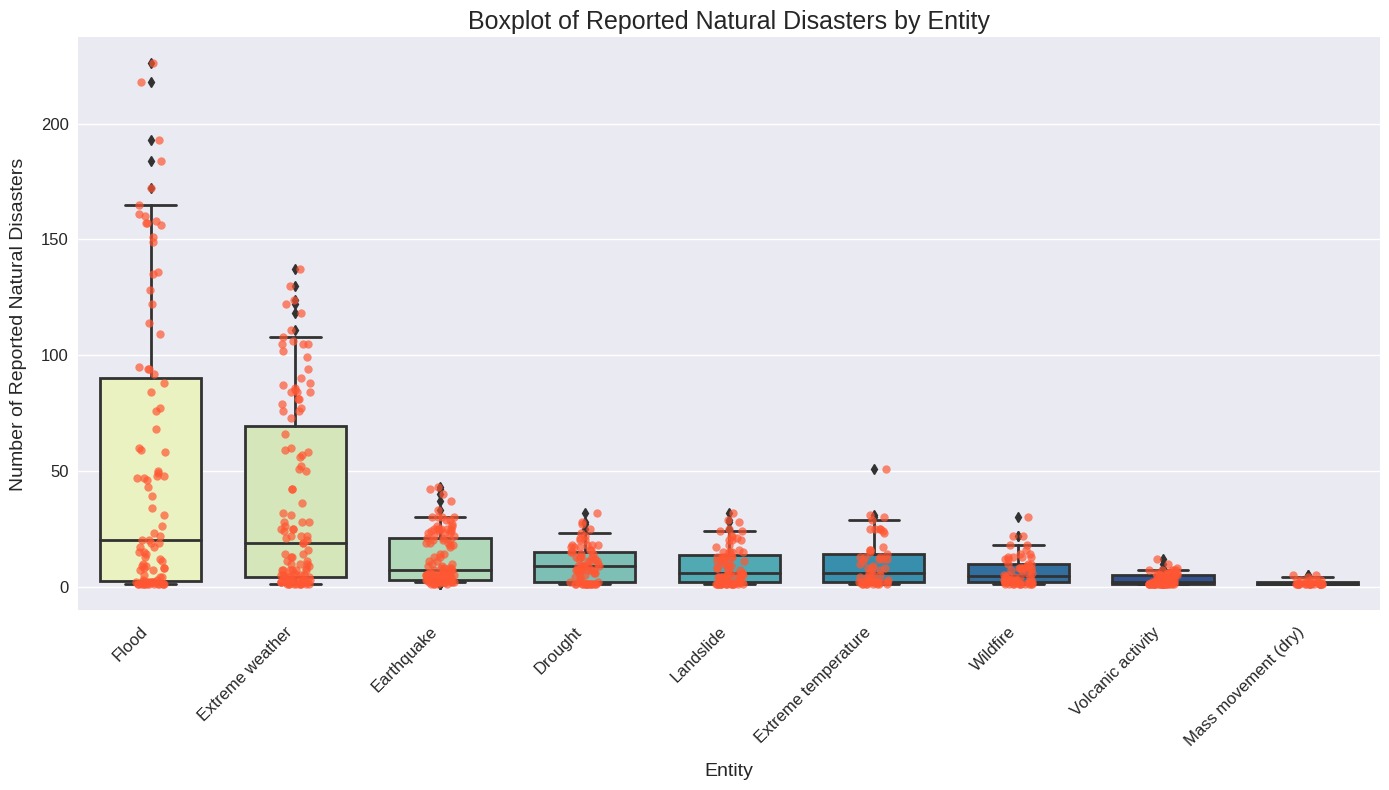

In [ ]:
sum_values = df.groupby('Entity')['Number of reported natural disasters (reported disasters)'].sum().sort_values(ascending=False).index

# Membuat palet warna untuk plot
colors = sns.color_palette("YlGnBu", n_colors=len(sum_values))

# Membuat boxplot
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x='Entity', y='Number of reported natural disasters (reported disasters)', data=df,
            ax=ax, width=0.7, linewidth=2, whis=[5, 95], order=sum_values, palette=colors)

sns.stripplot(x='Entity', y='Number of reported natural disasters (reported disasters)', data=df,
              ax=ax, order=sum_values, color='#FF5733', size=6, alpha=0.7)

ax.set_title('Boxplot of Reported Natural Disasters by Entity', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
ax.tick_params(axis='x', pad=10)
ax.set_xlabel('Entity', fontsize=14, labelpad=10)
ax.set_ylabel('Number of Reported Natural Disasters', fontsize=14, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.yaxis.grid(True, alpha=1)

plt.tight_layout()
plt.show()

## **Insight**
- Ada beberapa entitas yang memiliki **rentang interquartile (IQR) yang lebar**, menunjukkan variasi yang **signifikan** dalam jumlah laporan bencana alam.
- Ada juga beberapa entitas yang memiliki **banyak outlier**, yang menunjukkan bahwa beberapa entitas mengalami jumlah laporan bencana alam yang sangat **tinggi**.

## **Statistik**/**Fakta dari Data**
Terlihat bahwa **bencana cuaca ekstrem (`Extreme weather`) dan banjir (`Flood`) memiliki variasi dan jumlah laporan yang tinggi** dibandingkan dengan jenis bencana lainnya. **Gempa bumi (`Earthquake`) juga memiliki variasi yang signifikan dan jumlah laporan yang lebih tinggi pada periode tertent**u. Kekeringan (`Drought`) dan aktivitas gunung berapi (`Volcanic activity`) memiliki jumlah laporan yang **lebih rendah secara umum**.

#**Scatterplot**

Kode ini digunakan untuk membuat visualisasi berupa scatterplot yang menggambarkan tren jumlah bencana alam yang dilaporkan dari waktu ke waktu. Pertama, data yang digabungkan dari dataframe `df` dengan menggunakan `groupby` untuk menghitung total jumlah bencana alam yang dilaporkan tiap tahun.

Selanjutnya, kita **membuat scatterplot** dengan menggunakan `sns.scatterplot`. Pada scatterplot ini, sumbu x adalah tahun (Year), dan sumbu y adalah jumlah bencana alam yang dilaporkan. Warna titik-titik pada scatterplot dibedakan berdasarkan tahun menggunakan palet warna yang telah dibuat sebelumnya (`barplot_palette`).

Grafik ini diberi **label, judul, dan label sumbu** untuk mempermudah pemahaman, serta garis grid pada sumbu y untuk memberikan panduan visual. Ukuran label-sumbu dan label-sumbu-x juga disesuaikan untuk penampilan yang lebih baik.

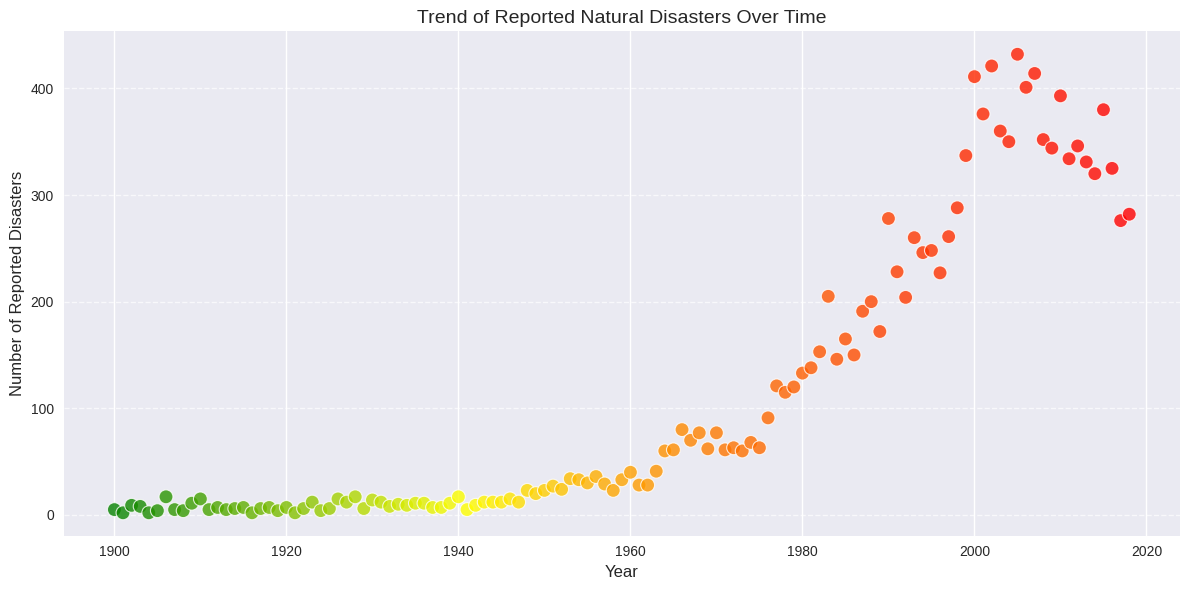

In [ ]:
combined_data = df.groupby('Year')['Number of reported natural disasters (reported disasters)'].sum().reset_index()

# Membuat scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_data, x='Year', y='Number of reported natural disasters (reported disasters)',
                hue='Year', palette=barplot_palette, s=100, alpha=0.8, legend=False)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reported Disasters', fontsize=12)
plt.title('Trend of Reported Natural Disasters Over Time', fontsize=14)

plt.tick_params(axis='x', labelsize=10)

plt.tight_layout()
plt.show()

## **Insight**
- **Tren cenderung naik** dalam jumlah bencana alam yang dilaporkan dari tahun ke tahun.
- Ada perubahan dalam **intensitas laporan** bencana alam seiring berjalannya waktu.

## **Statistik**/**Fakta dari Data**
- Jumlah bencana alam terlapor cenderung mengalami **fluktuasi**.
- Puncak tertinggi dalam jumlah bencana alam terlapor terjadi pada sekitar tahun **2000 hingga 2018**.

#**Pie Chart**

Kode di bawah digunakan untuk membuat visualisasi dalam bentuk pie chart yang menggambarkan proporsi jumlah bencana alam yang dilaporkan dari berbagai entitas. Pertama, data jumlah bencana alam yang dilaporkan tiap entitas dihitung dan diurutkan berdasarkan total jumlahnya.

Selanjutnya, kita **menentukan warna** untuk setiap slice pada pie chart dengan menghasilkan skala warna dari merah hingga kuning. Sebuah slice pertama dikeluarkan (explode) untuk memberikan penekanan visual.

Kemudian, kita **membuat pie chart** dengan menggunakan `plt.subplots()` dan `ax.pie()`. Setiap slice diidentifikasi oleh label yang sesuai dengan entitasnya, dan persentase ditampilkan pada slice jika nilainya lebih besar dari 3%. Warna dan edgecolor (warna tepi) dari setiap slice disesuaikan.

Grafik diberi **judul dan legenda** yang mencantumkan nama-nama entitas, serta label sumbu yang menunjukkan bahwa ini adalah data gabungan dari semua tahun. Teks pada pie chart dikonfigurasi untuk berwarna putih atau hitam tergantung pada tingkat kecerahan background slice.

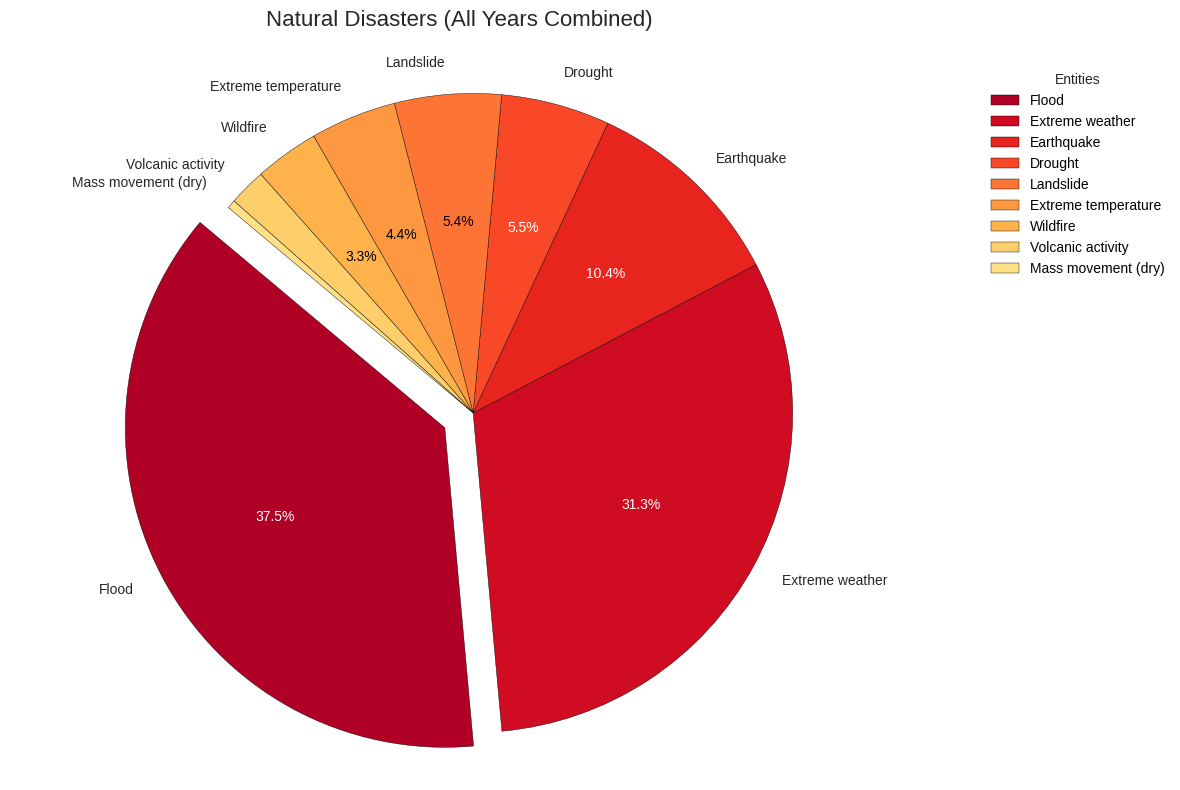

In [ ]:
total_disasters = df.groupby("Entity")["Number of reported natural disasters (reported disasters)"].sum()
total_disasters = total_disasters.sort_values(ascending=False)

# Menentukan warna
num_colors = len(total_disasters)
colors = plt.cm.YlOrRd(np.linspace(0.9, 0.2, num_colors))  # Dimulai dengan merah lalu berprogress ke kuning

# Memisahkan slice pertama dari pie chart
explode = (0.1,) + (0,) * (len(total_disasters) - 1)

# Membuat pie chart
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(
    total_disasters,
    labels=total_disasters.index,
    autopct=lambda p: f"{p:.1f}%" if p > 3 else "",   # Menampilkan persentase jika nilai slice lebih besar dari 3,
                                                      # tidak menampilkan persentase jika lebih kecil dari 3
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'black'},
)
plt.title("Natural Disasters (All Years Combined)", fontsize=16, pad=25)
plt.axis("equal")

legend = plt.legend(total_disasters.index, title="Entities", loc="upper right", bbox_to_anchor=(1.3, 1))

# Mengatur warna teks secara kondisional berdasarkan warna background
for autotext, color in zip(autotexts, colors):
    contrast_color = 'white' if np.mean(color[:3]) < 0.5 else 'black'  # Mentukan warna teks berdasarkan tingkat kecerahan background
    autotext.set_color(contrast_color)

for text in legend.get_texts():
    text.set_color('black')

plt.tight_layout()
plt.show()

## **Insight**
- Beberapa entitas mengalami jumlah **bencana alam yang jauh lebih tinggi** dibandingkan dengan yang lain.
- Terdapat perbedaan **signifikan** dalam jumlah bencana alam antara entitas tertentu.

## **Statistik**/**Fakta dari Data**
- `Flood` adalah jenis bencana alam yang **paling sering** terjadi di seluruh dataset.
- `Extreme weather` adalah jenis bencana alam kedua yang paling **umum** terjadi.
- `Earthquake` adalah jenis bencana alam lain yang **cukup signifikan** terjadi.
- Beberapa jenis bencana alam, seperti `Mass movement (dry)` dan `Volcanic activity`, terjadi **lebih jarang** dibandingkan dengan yang lain.